# Analysing exam grade trends

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [156]:
grades = pd.read_csv('data/psi_grades.csv')

grades = pd.read_csv('data/psi_grades.csv')
# get rid of nans in the Esito column:
grades = grades.dropna(subset=['Esito'])

# remove rows where Esito == "ASS":
grades = grades[grades['Esito'] != 'ASS']
# remove rows where Esito == 0
grades = grades[grades['Esito'] != '0']
# where Esito == "RIT" put -1
grades.loc[grades['Esito'] == 'RIT', 'Esito'] = -1


grades['Esito'] = grades['Esito'].astype(int)


grades.sort_values(by='Esito', ascending=False, inplace=True)
grade_counts = grades.groupby('Esito').count()
grade_counts.drop(['Anno Freq.', 'Misure Compensative'], axis=1, inplace=True)
grade_counts.columns = ['Count']

In [157]:
grade_counts

,Count
Esito,
-1,53
1,4
3,6
4,4
5,12
6,9
7,12
8,17
9,12


In [162]:
grade_counts

,Count
Esito,
-1,53
1,4
3,6
4,4
5,12
6,9
7,12
8,17
9,12


In [171]:
# how many grades are >= 18?
tried = int(grade_counts['Count'].sum())
passed = int(grade_counts[grade_counts.index >= 18]['Count'].sum())
pass_percent = 100 *passed / tried

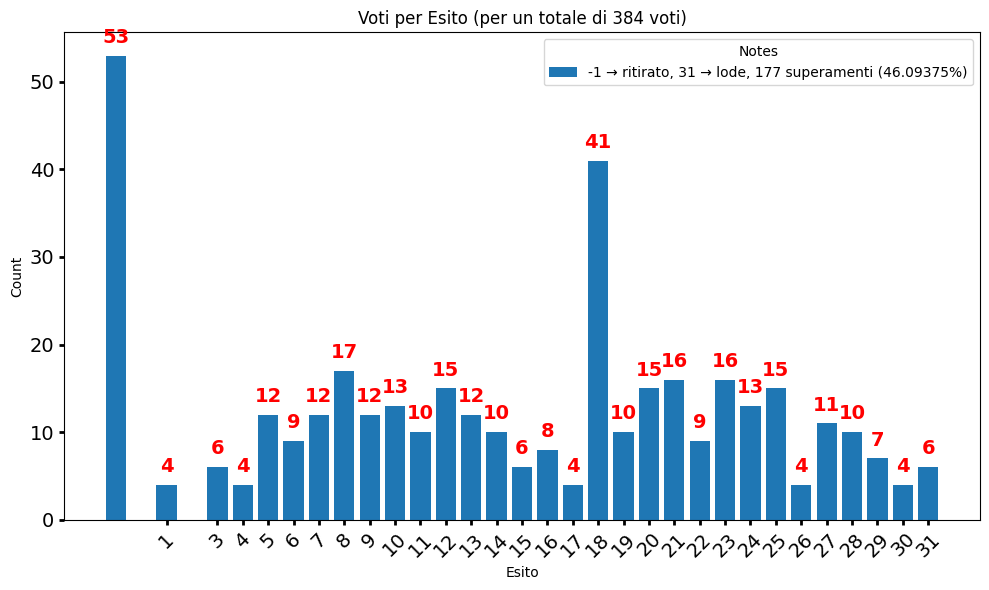

In [172]:
# sort by index (Esito) so bars are ordered
grade_counts = grade_counts.sort_index()

# plot as bar chart
plt.figure(figsize=(10, 6))  # bigger chart
plt.bar(grade_counts.index, grade_counts['Count'])

plt.xlabel('Esito')
plt.ylabel('Count')
plt.title('Voti per Esito (per un totale di ' + str(tried) + ' voti)')
plt.xticks(rotation=45)  # tilt labels if many categories
plt.xticks(grade_counts.index[1:])  # show all grades on x-axis

# increase tick font and weights:
plt.tick_params(axis='both', labelsize=14, width=2)

plt.legend(title="Notes",
           labels=[f"-1 → ritirato, 31 → lode, {passed} superamenti ({pass_percent}%)"])

# ---- annotate value of Esito = 18 ----
for grade in grade_counts.index:
    value = grade_counts.loc[grade, 'Count']
    plt.text(grade, value + 1,  # position slightly above the bar
             str(value),
             ha='center', va='bottom',
             fontsize=14, fontweight='bold', color='red')
    
plt.tight_layout()
plt.show()

In [141]:
grades = pd.read_csv('data/psi_grades.csv')


In [ ]:
trial_counts = grades.groupby('Matricola').count()
trial_counts.drop(['Esito', 'Misure Compensative'], axis=1, inplace=True)

In [143]:
trial_counts.columns = ['Count']

In [144]:
trial_counts.reset_index(inplace=True)

In [145]:
trial_frequencies = trial_counts.groupby('Count').count()

In [147]:
trial_frequencies.reset_index(inplace=True)

In [151]:
trial_frequencies.columns = ['Tentativi effettuati al momento (negli ultimi 12 appelli)', 'Numero di Studenti']

In [152]:
trial_frequencies

,Tentativi effettuati al momento (negli ultimi 12 appelli),Numero di Studenti
0,1,103
1,2,71
2,3,39
3,4,27
4,5,13
5,6,7
6,7,1
7,8,2
8,9,2
9,12,1
